# Looking at where incidents are occurring: County-level analysis
Are pipelines breaking that were installed after 2010 breaking in areas with higher population density than pre-2010?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load data

In [2]:
df_raw = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df_raw.columns

Index(['datafile_as_of', 'ff', 'significant', 'serious', 'report_number',
       'supplemental_number', 'report_received_date', 'report_type',
       'operator_id', 'name', 'operator_street_address', 'operator_city_name',
       'operator_state_abbreviation', 'operator_postal_code', 'local_datetime',
       'time_zone', 'daylight_savings_ind', 'iyear', 'location_street_address',
       'location_city_name', 'location_county_name',
       'location_state_abbreviation', 'location_postal_code',
       'location_latitude', 'location_longitude', 'total_cost',
       'total_cost_current', 'injury_ind', 'injure', 'num_pub_evacuated',
       'fatal', 'cause', 'cause_details', 'material_involved',
       'material_details', 'narrative', 'unintentional_release',
       'installation_year', 'decade'],
      dtype='object')

In [3]:
df_raw.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6111 BOLLINGER CANYON RD.,",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,"A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPROXIMATELY 2335 HOURS ON 2/13/10. THE FIRE DEPARTMENT CALLED AT PG&E AT APPROXIMATELY 0005 HOURS. THE PG&E GAS SERVICE REPRESENTATIVE (GSR) ARRIVED AT 0020 HOURS. THE FIRE DEPARTMENT AND GSR WERE UNABLE TO SHUT OFF THE SERVICE VALVE AT THE METER DUE TO DAMAGE TO THE VALVE BY THE FIRE. A GAS CREW WAS CALLED AND THEY CUT OFF THE GAS SERVICE AT THE MAIN AT APPROXIMATELY 02:30. ACCORDING TO THE FIRE DEPARTMENT THE THE FIRE APPEARS TO HAVE STARTED IN ONE OF THE CLOSETS IN THE HOME. THE HOUSE FIRE DAMAGED THE GAS METER WHICH RELEASED NATURAL GAS RESULTING IN A SECONDARY IGNITION. THE FIRE DAMAGE TO THE HOME RESULTED IN PROPERTY DAMAGES EXCEEDING $50,000. THERE WERE NO INJURIES AND NO FATALITIES. NO MAJOR MEDIA WAS PRESENT.",10.0,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3"" DISTRIBUTION LINE AT 45 PSI. HIT LINE, WHILE TAKING PRECAUTIONS TO SHUT DOWN SYSTEM, GAS MIGRATED TO NEARBY HOUSE AND EXPLODED. THERE WAS A REQUEST BY PHMSA THROUGH THE INDIANA PUBLIC SERVICE COMMISSION TO PROVIDE ADDTIONAL INFORMATION, AND/OR UPDATE SOME DATA FIELDS. ALL WERE COMPLETED AS REQUESTED EXCEPT PART G REQUESTING TO COMPLETE THE SECTION FOR PREVIOUS DAMAGE DUE TO EXCAVATION. THERE WAS NO PREVIOUS DAMAGE DUE TO EXCAVATION RELATED TO THIS INCIDENT. THE INFORMATION FOR THE ITEMS REQUESTED IS: 1. DATE OF MOST RECENT LEAK SURVEY CONDUCTED - ANSWER IS 3-11-2010. 2. HAS ONE OR MORE PRESSURE TEST BEEN COMPLETED SINCE ORIGINAL CONSTRUCTION AT THE POINT OF INCIDENT - ANSWER IS NONE. WITH ALL OF THE REQUESTED INFORMATION UPDATED THIS INCIDENT WILL BE CLOSED.",310.0,1990-01-01,1990-1999


### Clean county names for merging with Census population data

In [4]:
# convert county name to title case
df_raw['location_county_name'] = df_raw.location_county_name.str.title()

In [5]:
# get full state names instead of abbreviations

# load in CSV with state abbreviations and full names
df_state_abbvs = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
df_state_abbvs.head()

# merge dataframes to get a 'State' column with the state name
df_raw = df_raw.merge(df_state_abbvs, left_on='location_state_abbreviation', right_on='Abbreviation')
df_raw.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,State,Abbreviation
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6111 BOLLINGER CANYON RD.,",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,San Joaquin,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,"A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPROXIMATELY 2335 HOURS ON 2/13/10. THE FIRE DEPARTMENT CALLED AT PG&E AT APPROXIMATELY 0005 HOURS. THE PG&E GAS SERVICE REPRESENTATIVE (GSR) ARRIVED AT 0020 HOURS. THE FIRE DEPARTMENT AND GSR WERE UNABLE TO SHUT OFF THE SERVICE VALVE AT THE METER DUE TO DAMAGE TO THE VALVE BY THE FIRE. A GAS CREW WAS CALLED AND THEY CUT OFF THE GAS SERVICE AT THE MAIN AT APPROXIMATELY 02:30. ACCORDING TO THE FIRE DEPARTMENT THE THE FIRE APPEARS TO HAVE STARTED IN ONE OF THE CLOSETS IN THE HOME. THE HOUSE FIRE DAMAGED THE GAS METER WHICH RELEASED NATURAL GAS RESULTING IN A SECONDARY IGNITION. THE FIRE DAMAGE TO THE HOME RESULTED IN PROPERTY DAMAGES EXCEEDING $50,000. THERE WERE NO INJURIES AND NO FATALITIES. NO MAJOR MEDIA WAS PRESENT.",10.0,NaN,NaN,California,CA
1,2/28/22,NO,NO,NO,20100022,15025,5/10/10,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6111 BOLLINGER CANYON RD.,",SAN RAMON,CA,94583,1/9/10 16:27,NaN,NaN,2010,HEMLOCK ST & O ST,EUREKA,Humboldt,CA,95501,40.77320,-124.15280,2500,3043.026398,NO,0,16.0,0,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",STEEL,NaN,"ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 MAGNITUDE EARTHQUAKE STRUCK THE EUREKA AREA. AT APPROXIMATLEY 1945 HOURS PG&E WAS NOTIFIED OF A GAS LEAK ON A 0.75-INCH STEEL SERVICE IN THE INTERSECTION OG HEMLOCK AND 0 STREETS. THE LEAK APPEARS TO HAVE BEEN CAUSED BY THE EARTHQUAKE. THE EUREKA POLICE AND FIRE DEPARTMENTS WERE ON SCENE AND BLOCKED OFF THE AREA. THE FIRE DEPARTMENT EVACUATED 16 HOMES AS A PRECAUTION. PG&E CREWS WERE ON SCENE AT 2030 HOURS. PROPERTY DAMAGES WERE LESS THAN $50,000. THERE WERE NO FATALITIES OR INJURIES AS A RESULT OF THIS INCIDENT. THIS INCIDENT BECAME REPORTABLE WHEN DOT OFFICE OF PIPELINE SAFETY BECAME AWARE OF THIS INCIDENT DUE TO NEWS COVERAGE.",102.0,NaN,NaN,California,CA


In [6]:
# creating new column with full state name instead of state abbreviation
df_raw['county_full_name'] = df_raw['location_county_name'] + " County, " + df_raw['State']
df_raw.county_full_name.head()

0    San Joaquin County, California
1       Humboldt County, California
2     Sacramento County, California
3    San Joaquin County, California
4     Stanislaus County, California
Name: county_full_name, dtype: object

## Load Census population data

In [7]:
# census population data downloaded from Decennial Census 2020 P1 Race table
df_population = pd.read_csv('../data/source/DECENNIALPL2020.P1_2022-04-27T211220_COUNTIES/DECENNIALPL2020.P1_data_with_overlays_2022-04-26T230600.csv')

# drop first row
df_population = df_population.iloc[1:]

# keep only GEO_ID, NAME (area), P1_001N (total)
df_population = df_population[['GEO_ID', 'NAME', 'P1_001N']]

# convert P1_001N to numeric
df_population.P1_001N = df_population.P1_001N.astype(int)

df_population.head()

,GEO_ID,NAME,P1_001N
1,0500000US01001,"Autauga County, Alabama",58805
2,0500000US01003,"Baldwin County, Alabama",231767
3,0500000US01005,"Barbour County, Alabama",25223
4,0500000US01007,"Bibb County, Alabama",22293
5,0500000US01009,"Blount County, Alabama",59134


In [8]:
df_population[df_population.NAME == 'Los Angeles County, California']

,GEO_ID,NAME,P1_001N
206,0500000US06037,"Los Angeles County, California",10014009


## Merge dataframes

In [9]:
df_merge = df_raw.merge(df_population, left_on='county_full_name', right_on='NAME', how ='left')
df_merge.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,State,Abbreviation,county_full_name,GEO_ID,NAME,P1_001N
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6111 BOLLINGER CANYON RD.,",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,San Joaquin,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,"A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPROXIMATELY 2335 HOURS ON 2/13/10. THE FIRE DEPARTMENT CALLED AT PG&E AT APPROXIMATELY 0005 HOURS. THE PG&E GAS SERVICE REPRESENTATIVE (GSR) ARRIVED AT 0020 HOURS. THE FIRE DEPARTMENT AND GSR WERE UNABLE TO SHUT OFF THE SERVICE VALVE AT THE METER DUE TO DAMAGE TO THE VALVE BY THE FIRE. A GAS CREW WAS CALLED AND THEY CUT OFF THE GAS SERVICE AT THE MAIN AT APPROXIMATELY 02:30. ACCORDING TO THE FIRE DEPARTMENT THE THE FIRE APPEARS TO HAVE STARTED IN ONE OF THE CLOSETS IN THE HOME. THE HOUSE FIRE DAMAGED THE GAS METER WHICH RELEASED NATURAL GAS RESULTING IN A SECONDARY IGNITION. THE FIRE DAMAGE TO THE HOME RESULTED IN PROPERTY DAMAGES EXCEEDING $50,000. THERE WERE NO INJURIES AND NO FATALITIES. NO MAJOR MEDIA WAS PRESENT.",10.0,NaN,NaN,California,CA,"San Joaquin County, California",0500000US06077,"San Joaquin County, California",779233.0
1,2/28/22,NO,NO,NO,20100022,15025,5/10/10,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6111 BOLLINGER CANYON RD.,",SAN RAMON,CA,94583,1/9/10 16:27,NaN,NaN,2010,HEMLOCK ST & O ST,EUREKA,Humboldt,CA,95501,40.77320,-124.15280,2500,3043.026398,NO,0,16.0,0,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",STEEL,NaN,"ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 MAGNITUDE EARTHQUAKE STRUCK THE EUREKA AREA. AT APPROXIMATLEY 1945 HOURS PG&E WAS NOTIFIED OF A GAS LEAK ON A 0.75-INCH STEEL SERVICE IN THE INTERSECTION OG HEMLOCK AND 0 STREETS. THE LEAK APPEARS TO HAVE BEEN CAUSED BY THE EARTHQUAKE. THE EUREKA POLICE AND FIRE DEPARTMENTS WERE ON SCENE AND BLOCKED OFF THE AREA. THE FIRE DEPARTMENT EVACUATED 16 HOMES AS A PRECAUTION. PG&E CREWS WERE ON SCENE AT 2030 HOURS. PROPERTY DAMAGES WERE LESS THAN $50,000. THERE WERE NO FATALITIES OR INJURIES AS A RESULT OF THIS INCIDENT. THIS INCIDENT BECAME REPORTABLE WHEN DOT OFFICE OF PIPELINE SAFETY BECAME AWARE OF THIS INCIDENT DUE TO NEWS COVERAGE.",102.0,NaN,NaN,California,CA,"Humboldt County, California",0500000US06023,"Humboldt County, California",136463.0


## Analyze by county

In [10]:
df_merge.groupby('decade').P1_001N.mean()

decade
1900-1909    1.651421e+06
1910-1919    1.793561e+06
1920-1929    1.946104e+06
1930-1939    1.922754e+06
1940-1949    2.053062e+06
1950-1959    1.296916e+06
1960-1969    1.183644e+06
1970-1979    1.282280e+06
1980-1989    1.333264e+06
1990-1999    9.466829e+05
2000-2009    1.105683e+06
>2010        1.067947e+06
Name: P1_001N, dtype: float64

<AxesSubplot:xlabel='decade'>

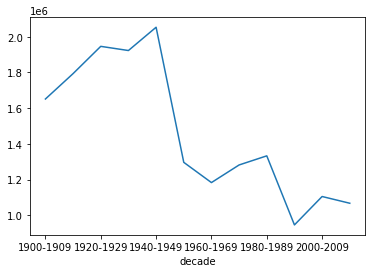

In [11]:
df_merge.groupby('decade').P1_001N.mean().plot()

In [12]:
df_merge.groupby('decade').P1_001N.median()

decade
1900-1909    1694251.0
1910-1919    1793561.0
1920-1929    1304127.0
1930-1939     919489.5
1940-1949    1004457.0
1950-1959     674721.0
1960-1969     431279.0
1970-1979     632043.5
1980-1989     584526.0
1990-1999     423635.0
2000-2009     495747.0
>2010         486492.0
Name: P1_001N, dtype: float64

<AxesSubplot:xlabel='decade'>

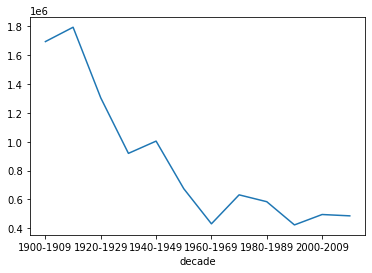

In [13]:
df_merge.groupby('decade').P1_001N.median().plot()

<AxesSubplot:xlabel='decade'>

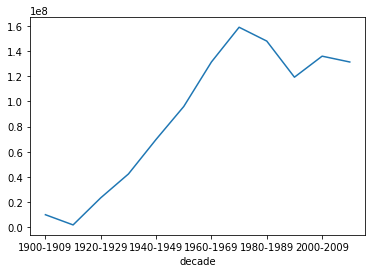

In [14]:
df_merge.groupby('decade').P1_001N.sum().plot()

In [15]:
df_merge[df_merge.decade == '1960-1969'].county_full_name.value_counts().head(10)

Cook County, Illinois             4
Los Angeles County, California    4
Oakland County, Michigan          4
King County, Washington           3
Richmond County, Georgia          3
Lucas County, Ohio                2
Hennepin County, Minnesota        2
Cuyahoga County, Ohio             2
Oklahoma County, Oklahoma         2
Clark County County, Nevada       2
Name: county_full_name, dtype: int64

In [16]:
df_merge.county_full_name.value_counts().head(10)

Los Angeles County, California    29
Dallas County, Texas              18
Westchester County, New York      17
Cook County, Illinois             15
Harris County, Texas              14
Oakland County, Michigan          14
New York County, New York         13
Clark County County, Nevada       13
Kings County, New York            13
Riverside County, California      12
Name: county_full_name, dtype: int64

## text analyis

In [17]:
# df_merge[df_merge.decade == '>2010'].narrative

In [18]:
df_merge[df_merge.name == 'PACIFIC GAS & ELECTRIC CO'].iyear.value_counts().sort_index()

2010    13
2011     2
2012     7
2013     8
2014    13
2015     8
2016     8
2017    11
2018     7
2019     2
2021     3
Name: iyear, dtype: int64

In [19]:
df_merge[df_merge.name == 'SOUTHERN CALIFORNIA GAS CO'].iyear.value_counts().sort_index()

2010     1
2011     3
2012     7
2013     5
2014     4
2015     5
2016     7
2017    10
2018     7
2019     4
2020     8
2021     5
Name: iyear, dtype: int64

In [20]:
df_merge[df_merge.name == 'CONSUMERS ENERGY CO'].iyear.value_counts().sort_index()

2010    5
2011    1
2013    3
2014    6
2015    8
2016    2
2017    5
2018    7
2019    7
2020    4
2021    4
2022    1
Name: iyear, dtype: int64

In [21]:
df_merge.name.value_counts().head(10)

PACIFIC GAS & ELECTRIC CO             82
SOUTHERN CALIFORNIA GAS CO            66
CONSUMERS ENERGY CO                   53
CONSOLIDATED EDISON CO OF NEW YORK    52
ATMOS ENERGY CORPORATION - MID-TEX    45
ATLANTA GAS LIGHT CO                  38
SOUTHWEST GAS CORP                    31
COLUMBIA GAS OF OHIO INC              30
WASHINGTON GAS LIGHT CO               28
NORTHERN ILLINOIS GAS CO              24
Name: name, dtype: int64